In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import warnings
warnings.filterwarnings("ignore")

Creación de variables categoricas

In [5]:
persona = ["Alumno/a", "Profesor/a", "Personal","Directivo/a"]
sexo = ["Masculino", "Femenino"]
domicilio = ["Madrid(Cuidad)","Villaviciosa","Boadilla","Móstoles","Getafe"]

Creación de los arrays para el dataset

In [6]:
n=1000
persona_data = []
sexo_data = []
domicilio_data = []

for i in range(0,1000):
    persona_data.append(np.random.choice(persona))
    sexo_data.append(np.random.choice(sexo))
    domicilio_data.append(np.random.choice(domicilio))

Creación datos de la altura

In [7]:
altura = 176 + 10 * np.random.randn(n)

Creación del dataset

In [8]:
universidad = pd.DataFrame(
    {
        "Persona" : persona_data,
        "Sexo" : sexo_data,
        "Domicilio" : domicilio_data,
        "Altura" : altura
    }
)
universidad.Altura = round(universidad.Altura,2)
universidad.head(10)

,Persona,Sexo,Domicilio,Altura
0,Alumno/a,Masculino,Boadilla,157.05
1,Profesor/a,Masculino,Villaviciosa,179.62
2,Directivo/a,Masculino,Villaviciosa,171.79
3,Profesor/a,Femenino,Madrid(Cuidad),190.74
4,Profesor/a,Femenino,Villaviciosa,173.62
5,Alumno/a,Masculino,Villaviciosa,163.19
6,Profesor/a,Masculino,Villaviciosa,192.35
7,Personal,Femenino,Villaviciosa,174.46
8,Directivo/a,Femenino,Madrid(Cuidad),175.56
9,Personal,Femenino,Boadilla,158.29


Introducción de edad dependiendo del tipo de persona que es

In [9]:
universidad["Edad"] = np.nan
universidad["Edad"][(universidad["Persona"] == "Alumno/a") ] = 20 + 1 * np.random.randn((universidad[universidad.Persona == 'Alumno/a'].shape[0]))
universidad["Edad"][(universidad["Persona"] == "Profesor/a") ] = 40 + 4 * np.random.randn((universidad[universidad.Persona == 'Profesor/a'].shape[0]))
universidad["Edad"][(universidad["Persona"] == "Personal") ] = 40 + 4 * np.random.randn((universidad[universidad.Persona == 'Personal'].shape[0]))
universidad["Edad"][(universidad["Persona"] == "Directivo/a") ] = 50 + 4 * np.random.randn((universidad[universidad.Persona == 'Directivo/a'].shape[0]))
universidad.Edad = round(universidad.Edad)

In [10]:
universidad.head(10)

,Persona,Sexo,Domicilio,Altura,Edad
0,Alumno/a,Masculino,Boadilla,157.05,19.0
1,Profesor/a,Masculino,Villaviciosa,179.62,38.0
2,Directivo/a,Masculino,Villaviciosa,171.79,52.0
3,Profesor/a,Femenino,Madrid(Cuidad),190.74,47.0
4,Profesor/a,Femenino,Villaviciosa,173.62,45.0
5,Alumno/a,Masculino,Villaviciosa,163.19,19.0
6,Profesor/a,Masculino,Villaviciosa,192.35,33.0
7,Personal,Femenino,Villaviciosa,174.46,44.0
8,Directivo/a,Femenino,Madrid(Cuidad),175.56,53.0
9,Personal,Femenino,Boadilla,158.29,39.0


Gráfica de histogramas de la altura

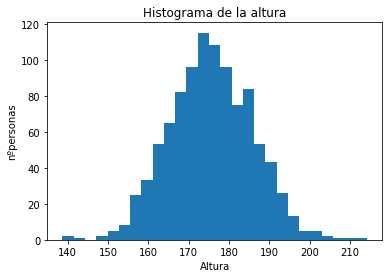

In [11]:
k = int(np.ceil(1+np.log2(40000000)))
plt.hist(universidad["Altura"], bins = k)
plt.xlabel("Altura")
plt.ylabel("nºpersonas")
plt.title("Histograma de la altura")

Agrupacíón doble por persona y sexo

In [12]:
uni_dou_group = universidad.groupby(["Persona", "Sexo"])
uni_dou_group.mean().round(1)

Altura 
 Edad 
 
 
 Persona 
 Sexo 
 
 
 
 
 
 
 Alumno/a 
 Femenino 
 175.5 
 20.0 
 
 
 Masculino 
 174.9 
 19.9 
 
 
 Directivo/a 
 Femenino 
 175.5 
 50.0 
 
 
 Masculino 
 175.4 
 50.4 
 
 
 Personal 
 Femenino 
 177.6 
 40.0 
 
 
 Masculino 
 175.6 
 39.4 
 
 
 Profesor/a 
 Femenino 
 175.9 
 40.9 
 
 
 Masculino 
 174.2 
 40.4

In [13]:
uni_dou_group.size()

In [14]:
uni_dou_group.aggregate([np.sum, np.mean, np.std])

Altura 
 Edad 
 
 
 
 
 sum 
 mean 
 std 
 sum 
 mean 
 std 
 
 
 Persona 
 Sexo 
 
 
 
 
 
 
 
 
 
 
 Alumno/a 
 Femenino 
 24750.31 
 175.534113 
 9.976488 
 2815.0 
 19.964539 
 1.085037 
 
 
 Masculino 
 21332.21 
 174.854180 
 9.893483 
 2422.0 
 19.852459 
 0.984778 
 
 
 Directivo/a 
 Femenino 
 21056.26 
 175.468833 
 11.591793 
 6002.0 
 50.016667 
 3.832596 
 
 
 Masculino 
 20692.43 
 175.359576 
 9.765217 
 5944.0 
 50.372881 
 3.797878 
 
 
 Personal 
 Femenino 
 22553.41 
 177.585906 
 10.495537 
 5077.0 
 39.976378 
 4.008848 
 
 
 Masculino 
 23875.65 
 175.556250 
 9.811164 
 5356.0 
 39.382353 
 4.066227 
 
 
 Profesor/a 
 Femenino 
 20758.79 
 175.921949 
 10.015321 
 4823.0 
 40.872881 
 4.297776 
 
 
 Masculino 
 20560.83 
 174.244322 
 10.045213 
 4773.0 
 40.449153 
 3.657559

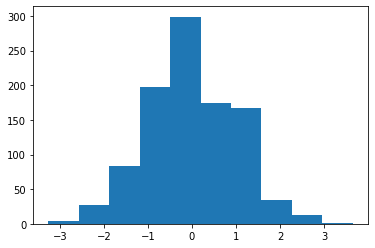

In [15]:
zscore = lambda x : (x - x.mean())/x.std()
z_group = uni_dou_group.transform(zscore)
plt.hist(z_group["Edad"])
plt.title("")

In [16]:
check = (universidad ['Edad']<40)
check

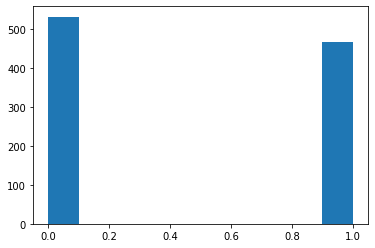

In [17]:
plt.hist(check.astype(int))

In [18]:
training = universidad[check]
testing = universidad[~check]
print(len(training))
print(len(testing))

468
532


In [19]:
train, test = train_test_split(universidad, test_size = 0.25)
print(len(train))
print(len(test))

750
250


In [20]:
data = sklearn.utils.shuffle(universidad)
cut_id = int(0.70*len(universidad))
train_data = data[:cut_id]
test_data = data[cut_id+1:]
print(len(train_data))
print(len(test_data))

700
299
